In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
combinedchemical = pd.read_csv('combinedchemicaldata.csv')
combinedchemical.head()

C:\Users\timos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Latitude,Longitude,MeasureValue,Parameter,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,ParameterName with Measure
0,0,2010-01-11,37.91011,-76.17137,22.1230,CHLA,NaN,NaN,17.0,94013.0,CB5.3,10:28:00,20801010000,Lower Chesapeake Bay,51001,Accomack County,VA,ACTIVE CHLOROPHYLL-A 22.123 UG/L
1,1,2010-01-11,38.58070,-76.05870,3.0700,CHLA,NaN,NaN,2.3,94015.0,ET5.2,10:40:00,20600050503,La Trappe Creek-Choptank River,24019,Dorchester County,MD,ACTIVE CHLOROPHYLL-A 3.07 UG/L
2,2,2010-01-11,37.91011,-76.17137,8.1000,PH,NaN,NaN,0.5,94013.0,CB5.3,10:28:00,20801010000,Lower Chesapeake Bay,51001,Accomack County,VA,PH CORRECTED FOR TEMPERATURE (25 DEG C) 8.1 SU
3,3,2010-01-11,37.58124,-76.05799,15.5928,CHLA,NaN,NaN,1.0,94023.0,CB7.1S,11:48:00,20801010000,Lower Chesapeake Bay,51001,Accomack County,VA,ACTIVE CHLOROPHYLL-A 15.5928 UG/L
4,4,2010-01-11,37.58124,-76.05799,20.6925,CHLA,NaN,NaN,15.0,94023.0,CB7.1S,11:48:00,20801010000,Lower Chesapeake Bay,51001,Accomack County,VA,ACTIVE CHLOROPHYLL-A 20.6925 UG/L


In [4]:
combinedchemical.columns

Index(['Unnamed: 0', 'Date', 'Latitude', 'Longitude', 'MeasureValue',
       'Parameter', 'Problem', 'Qualifier', 'SampleDepth', 'SampleId',
       'Station', 'Time', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_', 'STATE_',
       'ParameterName with Measure'],
      dtype='object')

In [5]:
combinedchemical['Parameter'].unique()

array(['CHLA', 'PH', 'DO', 'SALINITY', 'WTEMP', 'TSS', 'TP', 'TN'],
      dtype=object)

In [6]:
combinedchemical.shape

(295851, 18)

In [15]:
df = combinedchemical.sort_values(['Parameter'])
df.head()

,Unnamed: 0,Date,Latitude,Longitude,MeasureValue,Parameter,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,ParameterName with Measure
0,0,2010-01-11,37.91011,-76.17137,22.1230,CHLA,NaN,NaN,17.0,94013.0,CB5.3,10:28:00,20801010000,Lower Chesapeake Bay,51001,Accomack County,VA,ACTIVE CHLOROPHYLL-A 22.123 UG/L
229592,229592,2017-08-31,37.06237,-75.99937,5.6604,CHLA,NaN,NaN,1.0,429030.0,CB7.4N,10:18:00,20801010000,Lower Chesapeake Bay,51131,Northampton County,VA,ACTIVE CHLOROPHYLL-A 5.6604 UG/L
229591,229591,2017-08-31,37.06237,-75.99937,5.0730,CHLA,NaN,NaN,10.0,429030.0,CB7.4N,10:18:00,20801010000,Lower Chesapeake Bay,51131,Northampton County,VA,ACTIVE CHLOROPHYLL-A 5.073 UG/L
229590,229590,2017-08-31,37.06237,-75.99937,5.4468,CHLA,NaN,NaN,1.0,429030.0,CB7.4N,10:18:00,20801010000,Lower Chesapeake Bay,51131,Northampton County,VA,ACTIVE CHLOROPHYLL-A 5.4468 UG/L
229589,229589,2017-08-31,37.06237,-75.99937,4.9395,CHLA,NaN,NaN,10.0,429030.0,CB7.4N,10:18:00,20801010000,Lower Chesapeake Bay,51131,Northampton County,VA,ACTIVE CHLOROPHYLL-A 4.9395 UG/L


In [24]:
df_CHLA = df[df['Parameter'] == 'CHLA']
df_PH = df[df['Parameter'] == 'PH']
df_DO = df[df['Parameter'] == 'DO']
df_SALINITY = df[df['Parameter'] == 'SALINITY']
df_WTEMP = df[df['Parameter'] == 'WTEMP']
df_TSS = df[df['Parameter'] == 'TSS']
df_TP = df[df['Parameter'] == 'TP']
df_TN = df[df['Parameter'] == 'TN']

In [36]:
print(df_CHLA.shape)
print(df_PH.shape)
print(df_DO.shape)
print(df_SALINITY.shape)
print(df_WTEMP.shape)
print(df_TSS.shape)
print(df_TP.shape)
print(df_TN.shape)

(12249, 18)
(61544, 18)
(61912, 18)
(61895, 18)
(61929, 18)
(12451, 18)
(11809, 18)
(12062, 18)


In [37]:
import matplotlib.pyplot as plt

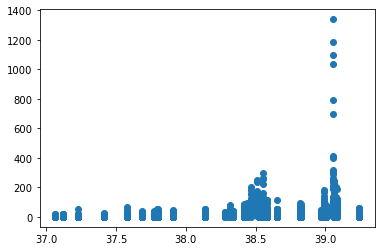

In [50]:
plt.scatter(x=df_CHLA['Latitude'], y=df_CHLA['MeasureValue'])
plt.show()

In [51]:
X_CHLA = df_CHLA['Latitude'].values.reshape(-1,1)
y_CHLA = df_CHLA['MeasureValue'].values.reshape(-1,1)

CHLA = LinearRegression().fit(X_CHLA, y_CHLA)

CHLA.score(X_CHLA,y_CHLA)

0.04275634481594015

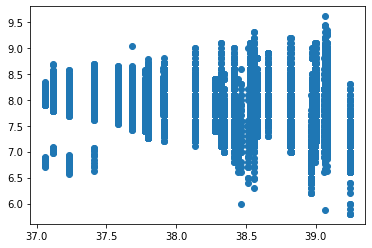

In [53]:
plt.scatter(x=df_PH['Latitude'], y=df_PH['MeasureValue'])
plt.show()

In [52]:
X_PH = df_PH['Latitude'].values.reshape(-1,1)
y_PH = df_PH['MeasureValue'].values.reshape(-1,1)

PH = LinearRegression().fit(X_PH, y_PH)

PH.score(X_PH,y_PH)

0.1305628208307732

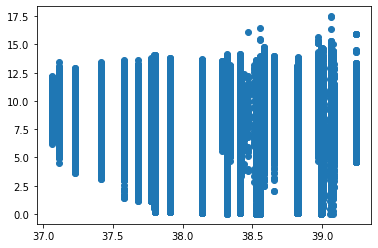

In [54]:
plt.scatter(x=df_DO['Latitude'], y=df_DO['MeasureValue'])
plt.show()

In [55]:
X_DO = df_DO['Latitude'].values.reshape(-1,1)
y_DO = df_DO['MeasureValue'].values.reshape(-1,1)

DO = LinearRegression().fit(X_DO, y_DO)

DO.score(X_DO,y_DO)

0.0162658498358903

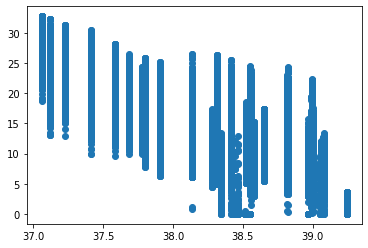

In [70]:
plt.scatter(x=df_SALINITY['Latitude'], y=df_SALINITY['MeasureValue'])
plt.show()

In [57]:
X_SALINITY = df_SALINITY['Latitude'].values.reshape(-1,1)
y_SALINITY = df_SALINITY['MeasureValue'].values.reshape(-1,1)

SALINITY = LinearRegression().fit(X_SALINITY, y_SALINITY)

SALINITY.score(X_SALINITY,y_SALINITY)

0.5411064170637934

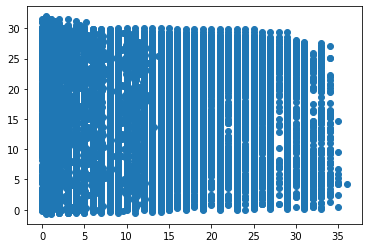

In [71]:
plt.scatter(x=df_WTEMP['SampleDepth'], y=df_WTEMP['MeasureValue'])
plt.show()

In [68]:
X_WTEMP = df_WTEMP['Latitude'].values.reshape(-1,1)
y_WTEMP = df_WTEMP['MeasureValue'].values.reshape(-1,1)

WTEMP = LinearRegression().fit(X_WTEMP, y_WTEMP)

WTEMP.score(X_WTEMP,y_WTEMP)

0.00020764378384063864

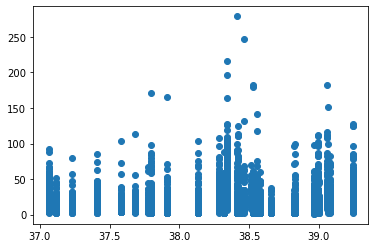

In [60]:
plt.scatter(x=df_TSS['Latitude'], y=df_TSS['MeasureValue'])
plt.show()

In [61]:
X_TSS = df_TSS['Latitude'].values.reshape(-1,1)
y_TSS = df_TSS['MeasureValue'].values.reshape(-1,1)

TSS = LinearRegression().fit(X_TSS, y_TSS)

TSS.score(X_TSS,y_TSS)

0.008377506222670417

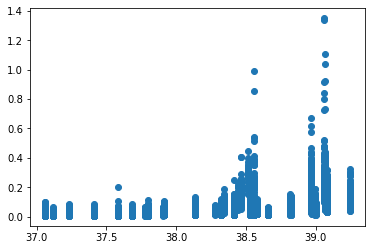

In [62]:
plt.scatter(x=df_TP['Latitude'], y=df_TP['MeasureValue'])
plt.show()

In [64]:
X_TP = df_TP['Latitude'].values.reshape(-1,1)
y_TP = df_TP['MeasureValue'].values.reshape(-1,1)

TP = LinearRegression().fit(X_TP, y_TP)

TP.score(X_TP,y_TP)

0.12826198998866323

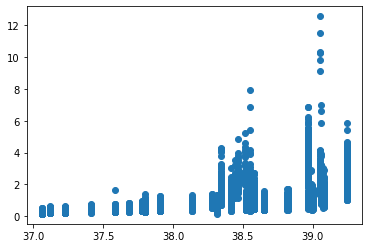

In [65]:
plt.scatter(x=df_TN['Latitude'], y=df_TN['MeasureValue'])
plt.show()

In [66]:
X_TN = df_TN['Latitude'].values.reshape(-1,1)
y_TN = df_TN['MeasureValue'].values.reshape(-1,1)

TN = LinearRegression().fit(X_TN, y_TN)

TN.score(X_TN,y_TN)

0.22943320603863615